In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
videos=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Analysis/1-Youtube Text Data Analysis/UScomments.csv',error_bad_lines=False)
videos.head()

b'Skipping line 41589: expected 4 fields, saw 11\nSkipping line 51628: expected 4 fields, saw 7\nSkipping line 114465: expected 4 fields, saw 5\n'
b'Skipping line 142496: expected 4 fields, saw 8\nSkipping line 189732: expected 4 fields, saw 6\nSkipping line 245218: expected 4 fields, saw 7\n'
b'Skipping line 388430: expected 4 fields, saw 5\n'
/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,video_id,comment_text,likes,replies
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0
4,XpVt6Z1Gjjo,trending 😉,3,0


In [ ]:
from textblob import TextBlob

In [ ]:
TextBlob('Logan Paul its yo big day ‼️‼️‼️').sentiment.polarity

0.0

In [ ]:
polarity=[]
for i in videos['comment_text']:
    try:
        polarity.append(TextBlob(i).sentiment.polarity)
    except:
        polarity.append(0)

In [ ]:
videos['polarity']=polarity

In [ ]:
videos.head(20)

,video_id,comment_text,likes,replies,polarity
0,XpVt6Z1Gjjo,Logan Paul it's yo big day ‼️‼️‼️,4,0,0.000000
1,XpVt6Z1Gjjo,I've been following you from the start of your...,3,0,0.000000
2,XpVt6Z1Gjjo,Say hi to Kong and maverick for me,3,0,0.000000
3,XpVt6Z1Gjjo,MY FAN . attendance,3,0,0.000000
4,XpVt6Z1Gjjo,trending 😉,3,0,0.000000
5,XpVt6Z1Gjjo,#1 on trending AYYEEEEE,3,0,0.000000
6,XpVt6Z1Gjjo,The end though 😭👍🏻❤️,4,0,0.000000
7,XpVt6Z1Gjjo,#1 trending!!!!!!!!!,3,0,0.000000
8,XpVt6Z1Gjjo,Happy one year vlogaversary,3,0,0.800000
9,XpVt6Z1Gjjo,You and your shit brother may have single hand...,0,0,-0.135714


# Word Cloud Representation of Sentiments

In [ ]:
comments_positive=videos[videos['polarity']==1]
comments_positive.head()

,video_id,comment_text,likes,replies,polarity
64,XpVt6Z1Gjjo,yu are the best,1,0,1.0
156,cLdxuaxaQwc,Power is the disease. Care is the cure. Keep...,0,0,1.0
227,WYYvHb03Eog,YAS Can't wait to get it! I just need to sell ...,0,0,1.0
307,sjlHnJvXdQs,This is priceless,0,0,1.0
319,sjlHnJvXdQs,Summed up perfectly,0,0,1.0


In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
total_comments=(''.join(comments_positive['comment_text']))
len(total_comments)

827171

(-0.5, 999.5, 499.5, -0.5)

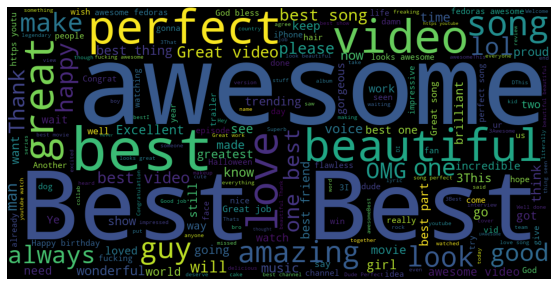

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')

In [ ]:
comments_negative=videos[videos['polarity']==-1]
comments_negative.head()

,video_id,comment_text,likes,replies,polarity
512,8wNr-NQImFg,BEN CARSON IS THE MAN!!!!! THEY HATE HIM CAUSE...,0,0,-1.0
562,8wNr-NQImFg,Well… The brain surgeon Ben Carson just proved...,0,0,-1.0
952,Ayb_2qbZHm4,WHY DID YOU MAKE FURRY FORCE?! SO NASTY!!!,0,0,-1.0
1371,vu_9muoxT50,WTF BRUH!!!!!!,0,0,-1.0
1391,vu_9muoxT50,cheeseus christ thats insane!!!,0,0,-1.0


In [ ]:
from wordcloud import WordCloud,STOPWORDS

In [ ]:
total_comments=(''.join(comments_negative['comment_text']))
len(total_comments)

187280

(-0.5, 999.5, 499.5, -0.5)

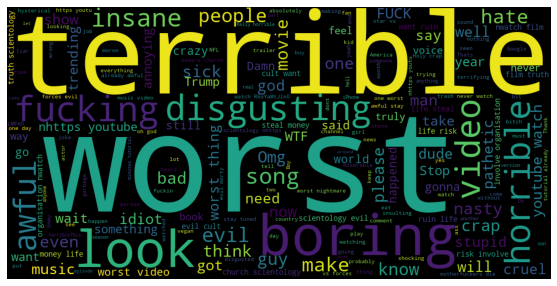

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(total_comments)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')

# Analyze Trending Tags & Views On YT

In [ ]:
videos2=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Data Analysis/1-Youtube Text Data Analysis/USvideos.csv',error_bad_lines=False)
videos2.head()

b'Skipping line 2401: expected 11 fields, saw 21\nSkipping line 2800: expected 11 fields, saw 21\nSkipping line 5297: expected 11 fields, saw 12\nSkipping line 5299: expected 11 fields, saw 12\nSkipping line 5300: expected 11 fields, saw 12\nSkipping line 5301: expected 11 fields, saw 12\n'


,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09


In [ ]:
tags_complete=(''.join(videos2['tags']))

In [ ]:
videos2['tags'][0]

'logan paul vlog|logan paul|logan|paul|olympics|logan paul youtube|vlog|daily|comedy|hollywood|parrot|maverick|bird|maverick clothes|diamond play button|logan paul diamond play button|10M subscribers|logan paul 1 year vlogging|1 year vlog|dwarf mamba play button|logan paul history|youtube history|10M|10M plaque|youtube button|diamond button|logang|logang 4 life'

In [ ]:
import re

In [ ]:
tags=re.sub('[^a-zA-Z]','',tags_complete)

In [ ]:
tags

'loganpaulvlogloganpaulloganpaulolympicsloganpaulyoutubevlogdailycomedyhollywoodparrotmaverickbirdmaverickclothesdiamondplaybuttonloganpauldiamondplaybuttonMsubscribersloganpaulyearvloggingyearvlogdwarfmambaplaybuttonloganpaulhistoryyoutubehistoryMMplaqueyoutubebuttondiamondbuttonlogangloganglifeAppleiPhoneiPhoneTeniPhonePortraitLightingABionicaugmentedrealityemojianimojiFaceIDApplePaycamerasmartphonenoneappleiphonexhandsonAppleiPhoneXiPhoneXappleiphonexfirstlookiPhoneXfirstlookappleiphonexeventappleiphonexeventiPhoneXpriceiPhoneXspecsiPhoneXdesigniPhoneXcameraiPhoneXhomebuttoniPhoneXwirelesschargingiPhoneXwaterproofiPhoneXreleasedateiphoneappleiphoneiosthevergevergejacksfilmsparodyparodiesiphoneiphonexiphoneappleemojiaafilmsatrailersindependentfilmstrailerHDofficialmoviefilmamoviesoscarwinneracademyawardwinnerTheDisasterArtistroomjamesfrancogregsesterotombisselldavefrancosethrogensethroganroomtrailerTheDisasterArtisttrailerTheDisasterArtistfilmdisasterartisttheroomtheroommovieTommyWis

In [ ]:
tags=re.sub(' +',' ',tags)

In [ ]:
tags

'loganpaulvlogloganpaulloganpaulolympicsloganpaulyoutubevlogdailycomedyhollywoodparrotmaverickbirdmaverickclothesdiamondplaybuttonloganpauldiamondplaybuttonMsubscribersloganpaulyearvloggingyearvlogdwarfmambaplaybuttonloganpaulhistoryyoutubehistoryMMplaqueyoutubebuttondiamondbuttonlogangloganglifeAppleiPhoneiPhoneTeniPhonePortraitLightingABionicaugmentedrealityemojianimojiFaceIDApplePaycamerasmartphonenoneappleiphonexhandsonAppleiPhoneXiPhoneXappleiphonexfirstlookiPhoneXfirstlookappleiphonexeventappleiphonexeventiPhoneXpriceiPhoneXspecsiPhoneXdesigniPhoneXcameraiPhoneXhomebuttoniPhoneXwirelesschargingiPhoneXwaterproofiPhoneXreleasedateiphoneappleiphoneiosthevergevergejacksfilmsparodyparodiesiphoneiphonexiphoneappleemojiaafilmsatrailersindependentfilmstrailerHDofficialmoviefilmamoviesoscarwinneracademyawardwinnerTheDisasterArtistroomjamesfrancogregsesterotombisselldavefrancosethrogensethroganroomtrailerTheDisasterArtisttrailerTheDisasterArtistfilmdisasterartisttheroomtheroommovieTommyWis

(-0.5, 99.5, 49.5, -0.5)

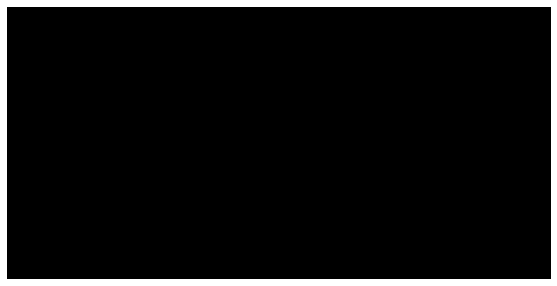

In [ ]:
wordcloud=WordCloud(width=1000,height=500,stopwords=set(STOPWORDS)).generate(tags)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud)
plt.axis('off')

Text(0.5, 1.0, 'Regression Plot for Likes v/s Views')

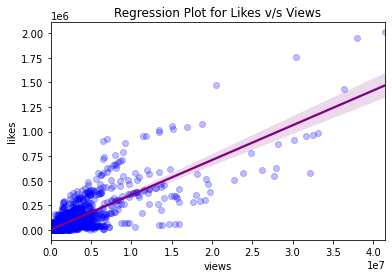

In [57]:
sns.regplot(data=videos2,x='views',y='likes',scatter_kws={'color': 'blue', 'alpha': 0.25}, line_kws = {'color': 'purple', 'alpha': 2.0})
plt.title('Regression Plot for Likes v/s Views')

Text(0.5, 1.0, 'Regression Plot for Dislikes v/s Views')

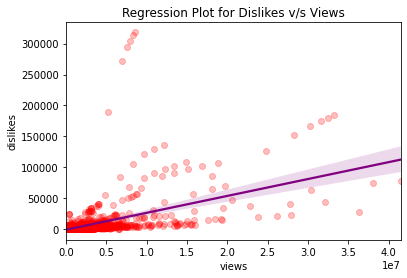

In [58]:
sns.regplot(data=videos2,x='views',y='dislikes',scatter_kws={'color': 'red', 'alpha': 0.25}, line_kws = {'color': 'purple', 'alpha': 2.0})
plt.title('Regression Plot for Dislikes v/s Views')

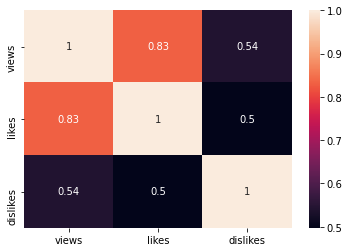

In [59]:
df_corr=videos2[['views','likes','dislikes']]
sns.heatmap(df_corr.corr(),annot=True)

In [60]:
!pip install emoji

     |████████████████████████████████| 51kB 1.5MB/s 
  Created wheel for emoji: filename=emoji-0.6.0-cp36-none-any.whl size=49716 sha256=d154c8da28b6e02102d12e5f839f68970aab020466c0393710486fe8c458cc1e
  Stored in directory: /root/.cache/pip/wheels/46/2c/8b/9dcf5216ca68e14e0320e283692dce8ae321cdc01e73e17796
Successfully built emoji


In [61]:
videos['comment_text'].isna().sum()

25

In [62]:
len(videos['comment_text'])

691400

In [66]:
videos['comment_text'][4]

'trending 😉'

In [67]:
'\U0001F600'

'😀'

In [78]:
str=''
for i in videos['comment_text']:
  list=[c for c in [i] if c in emoji.UNICODE_EMOJI]
  for ele in list:
    str=str+ele

In [79]:
print(str)

👍❤️😂❤️💄🖤💕😒👎🏽🐘💕😎🇺🇸🙏🇺🇸🇺🇸🌞💜😱💕🎈👍😕😻💄💦❤️❤😅💜🤴🏻😍💯❤😑💖❤🙏🏽♥️😂❤️😭💛😝😍❤😍💝👌🌞✌🏻😒👎🏽😂🇺🇸🙏🇺🇸🇺🇸💜😱🎈👍😴👍👍👍❤👍🔥💯🐍🐍😍👍😂👍❤💩😍👍😍💞♥️😻♥😂😃😴👍👍👍❤👍🔥💯🐍🐍😍👍😂👍❤💩😍👍😍💞♥️😻♥😂😃👍🤘🏾👍🙄😂👍👍🎢❤️👍🏾😂😍👍❤❤👌🤢🔥❤️😍🤗😢👍🔥👑😍👍💯❤🐍🐍💞♥️😂😀👌😍👍🤦🏾‍♂️💋👋👍😂❤😍❤️😭😍❤️❤💚♥👍🖤💚❤️💿❤️🥀👁😀😂👍🇩🇴❤❣️🔥🔥👑❤❤💛👌🏾🤢👍💚😍❤️🔥😢❤👍💯💖💞♥️🐍🐍👍😇❤️❤️👍🙌😄💕❤👍😎😛💋💯✌❤👍👌😱💖👍😂😂❤❤🎈🎈😍👁🔥👑😳❤💓💛😂👍🎈🤢💟❤️😍🔥❤❤💚🔥👍👍💯🐍🐍💞♥️🙌❤️😕😂😛👍😇😂❤💯👍❤❤👌👍😭❤️💙❤️😄🤢😍😍🤖🇧🇷😍♥😦🎈💖😄👌❤😍❤️❤👍😂🔥👑❤️🎈🎈👍😢🤢💚💟😌❤🔥🔥❤❤❤🙌👎😕👍😇🤥❤❤️🖕🏻😐❤️❤️💄💄🙏😄😀😂❤️😘🐍👍❤💖🌌👍😦😄😊😍❤😂👍🔥👑❤️❤️🎈👍🔥😢🤢😂😭🐢❤️👍🇦🇷🎩👍🇦🇷🎩🔥😢💗❤🙏😄💖👍♥💄🐍❤️😘🐍👍☺😊💀😄😦😄😂😍🙄😂🙁😑😒♥️👍😢😭🎩😂😂❤️😍😞🖤❤️😂🙏😄❤️👍💖❤❤️💄❤️🐍🐍🐍😊👍☺😊😦😍❤️😍🔥♥❤️😔💖🙌🔥♥😍💙❤️❤😍🎈🎈💖💜🙁❤👌🐽❤️💙❤♥️♥❤💯🔥😑😒💎♥♥😩😭😊😲😂😂😎❤❤️😂❤️👍💖😲😂❤️💟😍🙀😂😍😱🙌🔥💜💙💖😍❤️🎈🎈❤💜❤💯🙏🏼👌😂❤🙁🐽❤️👌♥❤😑😒🥀♥️💎😊🤚💕❤️😑😻😎🇹🇷😍❤👍🙌💕🥇😪🤙🏻❄️😆💋♥️😍😍💙🖕🏿😘❤❤🎈🎈❤😍💯🙏🏼🤣❤😂👏💞😍🙌😕💜🙁👍🏽👌😍🐽😑😒♥❤♥️😂🖖😂😍❤️🍻😨😻😂💕🥇❤💋♥👍🙌🙌😻🖕🏿❤😍😘❤️❤️❣🎈😍❤️❤😂🤣👏🙏🏼💯♥️💜🕊😍👍🏽👌❤🙁😍♥❤😑😒🐽😱❤😻😂❤️🌲🎷😳👌😎❤❤️👎🏼😢😭😉❤🇺🇸💕❤😨🎈👍👌🏽💕🥇🙄😻💋♥❤👍😍🚀❤️❤🦊🔥👍🏻🇬🇭😂😈💜👍😂🔥😍👍👌😂😁👎🏼👌😎😢😢❤😉🇺🇸💗❤️❤🙋🎈😊🤑😂😍👍😂❤️💖♥😍👍❤♥💜🤙🏻❤❤️♥🙄❤❤❤️😍❤️👍😂😀👌😁👌😎👎🏼👍😢🐍😢😍❤️❤👍😮🕳🙇❤😍❤💖😂❤️❤❤️❤️😍🤗💖💙♥🌷😍🤣😂😂💪🏽😁♥😆💕❤❤️💜🤘👍👌❤️🖤😂😗💩😇😐🕶💎💚🐱😍👃😂❤💗😂💖😱❤️💖❤😂🙇❤😍❤💜❤️❤️💙😍💘💜🌷💖❤😍❤🤣😂👌❤️❤️😏💪🏽❤️❤❤️👋❤👀🤙😂✔️💚👏👍😺❤️💓😔😂😍😂🙇❤😍❤💜❤✊💜❤️💙😝❤💖❤❤️🤣😂😊😍❤💪🏽❤️❤️😍👋💔😥❤️🐘😒👍❤️👀💙👍😂👍😂😢👍😭👏👍❤😺🐱👍😍👍🙇❤😍❤😊💙👍💜❤❤

In [80]:
len(str)

1875

In [81]:
len(set(str))

199

In [87]:
res={i:str.count(i) for [i] in set(str)}
res

{'\u200d': 6,
 '™': 1,
 '▫': 1,
 '☄': 1,
 '☠': 1,
 '☹': 1,
 '☺': 2,
 '♂': 5,
 '♥': 56,
 '✊': 1,
 '✋': 1,
 '✌': 4,
 '✔': 1,
 '✨': 1,
 '❄': 1,
 '❓': 4,
 '❣': 2,
 '❤': 312,
 '️': 189,
 '🅱': 1,
 '🇦': 3,
 '🇧': 4,
 '🇨': 1,
 '🇩': 3,
 '🇪': 1,
 '🇬': 1,
 '🇭': 1,
 '🇱': 2,
 '🇴': 1,
 '🇷': 7,
 '🇸': 9,
 '🇹': 1,
 '🇺': 9,
 '🇿': 1,
 '🌌': 1,
 '🌞': 2,
 '🌬': 1,
 '🌲': 1,
 '🌶': 1,
 '🌷': 2,
 '🌹': 7,
 '🍆': 1,
 '🍈': 1,
 '🍪': 1,
 '🍷': 1,
 '🍻': 1,
 '🎃': 4,
 '🎈': 21,
 '🎢': 1,
 '🎣': 1,
 '🎩': 3,
 '🎷': 1,
 '🏴': 6,
 '🏻': 19,
 '🏼': 10,
 '🏽': 12,
 '🏾': 11,
 '🏿': 3,
 '🐉': 1,
 '🐍': 23,
 '🐐': 14,
 '🐘': 2,
 '🐙': 2,
 '🐝': 1,
 '🐢': 5,
 '🐦': 1,
 '🐱': 3,
 '🐶': 1,
 '🐸': 5,
 '🐽': 4,
 '🐾': 5,
 '👀': 3,
 '👁': 2,
 '👃': 1,
 '👅': 1,
 '👆': 1,
 '👋': 3,
 '👌': 24,
 '👍': 130,
 '👎': 12,
 '👏': 14,
 '👑': 6,
 '👨': 1,
 '👻': 2,
 '👽': 1,
 '💀': 1,
 '💁': 2,
 '💃': 1,
 '💄': 6,
 '💋': 6,
 '💎': 3,
 '💓': 20,
 '💔': 10,
 '💕': 21,
 '💖': 38,
 '💗': 12,
 '💘': 5,
 '💙': 20,
 '💚': 9,
 '💛': 5,
 '💜': 28,
 '💝': 2,
 '💞': 7,
 '💟': 8,
 '💥': 1,
 '💦': 1,
 '💩': 7,
 '💪': 3,

In [126]:
res={k: v for k, v in sorted(res.items(), key=lambda item: item[1])}
res

{'\u200d': 6,
 '™': 1,
 '▫': 1,
 '☄': 1,
 '☠': 1,
 '☹': 1,
 '☺': 2,
 '♂': 5,
 '♥': 56,
 '✊': 1,
 '✋': 1,
 '✌': 4,
 '✔': 1,
 '✨': 1,
 '❄': 1,
 '❓': 4,
 '❣': 2,
 '❤': 312,
 '️': 189,
 '🅱': 1,
 '🇦': 3,
 '🇧': 4,
 '🇨': 1,
 '🇩': 3,
 '🇪': 1,
 '🇬': 1,
 '🇭': 1,
 '🇱': 2,
 '🇴': 1,
 '🇷': 7,
 '🇸': 9,
 '🇹': 1,
 '🇺': 9,
 '🇿': 1,
 '🌌': 1,
 '🌞': 2,
 '🌬': 1,
 '🌲': 1,
 '🌶': 1,
 '🌷': 2,
 '🌹': 7,
 '🍆': 1,
 '🍈': 1,
 '🍪': 1,
 '🍷': 1,
 '🍻': 1,
 '🎃': 4,
 '🎈': 21,
 '🎢': 1,
 '🎣': 1,
 '🎩': 3,
 '🎷': 1,
 '🏴': 6,
 '🏻': 19,
 '🏼': 10,
 '🏽': 12,
 '🏾': 11,
 '🏿': 3,
 '🐉': 1,
 '🐍': 23,
 '🐐': 14,
 '🐘': 2,
 '🐙': 2,
 '🐝': 1,
 '🐢': 5,
 '🐦': 1,
 '🐱': 3,
 '🐶': 1,
 '🐸': 5,
 '🐽': 4,
 '🐾': 5,
 '👀': 3,
 '👁': 2,
 '👃': 1,
 '👅': 1,
 '👆': 1,
 '👋': 3,
 '👌': 24,
 '👍': 130,
 '👎': 12,
 '👏': 14,
 '👑': 6,
 '👨': 1,
 '👻': 2,
 '👽': 1,
 '💀': 1,
 '💁': 2,
 '💃': 1,
 '💄': 6,
 '💋': 6,
 '💎': 3,
 '💓': 20,
 '💔': 10,
 '💕': 21,
 '💖': 38,
 '💗': 12,
 '💘': 5,
 '💙': 20,
 '💚': 9,
 '💛': 5,
 '💜': 28,
 '💝': 2,
 '💞': 7,
 '💟': 8,
 '💥': 1,
 '💦': 1,
 '💩': 7,
 '💪': 3,

In [95]:
keys=[*res.keys()]
values=[*res.values()]

In [96]:
keys[0]

'🌲'

In [166]:
pd.DataFrame({'chars':keys[-11:],'num':values[-11:]})

,chars,num
0,🐍,23
1,👌,24
2,💜,28
3,🔥,28
4,💖,38
5,♥,56
6,😂,90
7,😍,120
8,👍,130
9,️,189


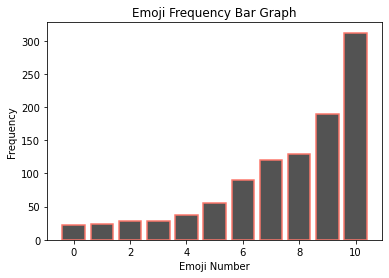

<Figure size 1080x1080 with 0 Axes>

In [181]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
emoji_number =[0,1,2,3,4,5,6,7,8,9,10]
Frequency = [23,24,28,28,38,56,90,120,130,189,312]
x_pos = np.arange(len(year))
plt.bar(emoji_number,Frequency,color = '#535353',edgecolor='#FC766AFF',linewidth=1.5)
plt.title('Emoji Frequency Bar Graph')
plt.xlabel('Emoji Number')
plt.ylabel('Frequency')
plt.figure(figsize=(15,15))
plt.show()